# Estadística Aplicada

Actividad 5

David Eduardo Gómez Marín - 1914352 - Grupo 41

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from lifelines import ExponentialFitter
from lifelines import WeibullFitter
from lifelines import LogNormalFitter


3.- En el enlace se encuentra la base de datos “quiebra.csv” que mide los años 
que tarda en quebrar una empresa (desde que se crea hasta que quiebra), la 
variable quebrar toma valores de 1 si la empresa quebró y 0 si esta censurada
(no se observó la quiebra en el periodo de observación). La variable mujer toma 
valores de 0 si el fundador de la empresa es hombre y 1 si el fundador de la 
empresa es mujer. La variable tiempo mide los años que tardo en quebrar la 
empresa. Responda en una notebook de Python cada inciso.
raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/quie

In [3]:
datos = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/quiebra.csv')

In [4]:
datos.head()

,tiempo,mujer,quebrar
0,21,0,1
1,16,1,0
2,26,1,1
3,17,1,0
4,29,1,1


In [5]:
#a) Ajuste un modelo de supervivencia exponencial
ModeloExponencial = ExponentialFitter().fit(datos['tiempo'], datos['quebrar'])


In [6]:
ModeloExponencial.print_summary()

<lifelines.ExponentialFitter:"Exponential_estimate", fitted with 100 total observations, 52 right-censored observations>
   number of observations = 100
number of events observed = 48
           log-likelihood = -212.48
               hypothesis = lambda_ != 0

---
          coef   se(coef)   coef lower 95%   coef upper 95%
lambda_  30.77       4.44            22.07            39.48

          cmp to    z      p   -log2(p)
lambda_     0.00 6.93 <0.005      37.77
---
AIC = 426.95

<Axes: >

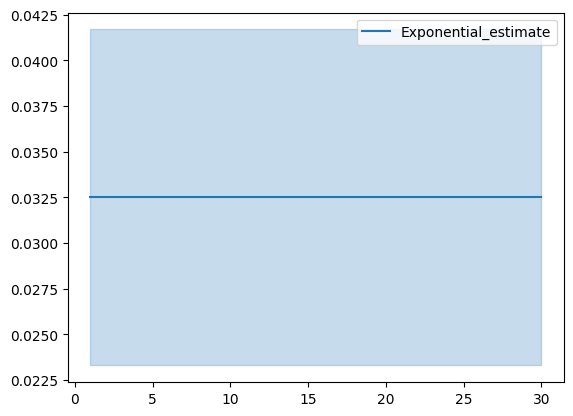

In [7]:
#b) Grafique la función de riesgo exponencial

ModeloExponencial.plot_hazard()

In [8]:
#c) ¿Cuál es el riesgo de que una empresa quiebre según la función exponencial? 
ModeloExponencial.hazard_

,Exponential_estimate
1.000000,0.032498
1.292929,0.032498
1.585859,0.032498
1.878788,0.032498
2.171717,0.032498
...,...
28.828283,0.032498
29.121212,0.032498
29.414141,0.032498
29.707071,0.032498


# 4.- Con la base de datos del punto 3 responda en la misma notebook lo siguiente:

a) Ajuste un modelo Weibull de supervivencia

In [9]:
Mweibull = WeibullFitter().fit(datos['tiempo'], datos['quebrar'])

In [10]:
Mweibull.print_summary()

<lifelines.WeibullFitter:"Weibull_estimate", fitted with 100 total observations, 52 right-censored observations>
   number of observations = 100
number of events observed = 48
           log-likelihood = -204.61
               hypothesis = lambda_ != 1, rho_ != 1

---
          coef   se(coef)   coef lower 95%   coef upper 95%
lambda_  25.46       2.26            21.03            29.89
rho_      1.69       0.20             1.30             2.09

          cmp to     z      p   -log2(p)
lambda_     1.00 10.83 <0.005      88.36
rho_        1.00  3.44 <0.005      10.73
---
AIC = 413.22

<Axes: >

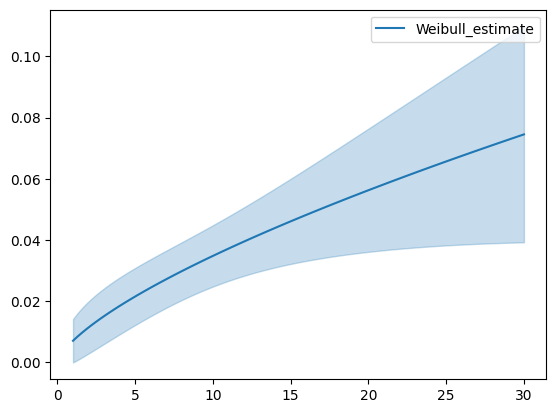

In [11]:
#b) Grafique la función de riesgo
Mweibull.plot_hazard()

c) ¿Qué forma tiene la función de riesgo? y ¿qué significa? 

La función de riesgo es creciente a través del tiempo, lo que significa que la probabilidad de que la empresa quiebre aumenta con el paso del tiempo. Esto nos indica una Gamma > 1

# 5.- Con la base de datos del punto 3 responda en la misma notebook lo siguiente:

a) Ajuste un modelo Log-Norma

In [12]:
mLogNormal = LogNormalFitter().fit(datos['tiempo'], datos['quebrar'])
mLogNormal.print_summary()

<lifelines.LogNormalFitter:"LogNormal_estimate", fitted with 100 total observations, 52 right-censored observations>
   number of observations = 100
number of events observed = 48
           log-likelihood = -210.44
               hypothesis = mu_ != 0, sigma_ != 1

---
         coef   se(coef)   coef lower 95%   coef upper 95%
mu_      3.02       0.13             2.78             3.27
sigma_   0.99       0.10             0.79             1.19

         cmp to     z      p   -log2(p)
mu_        0.00 24.04 <0.005     421.80
sigma_     1.00 -0.11   0.91       0.14
---
AIC = 424.87

<Axes: >

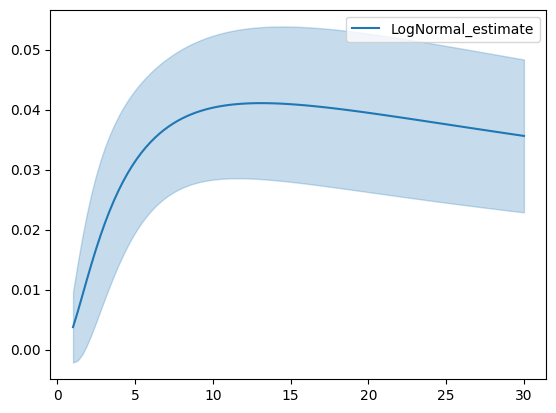

In [13]:
# b) Grafique la función de riesgo
mLogNormal.plot_hazard()

c) En qué periodo el riesgo de quebrar es creciente y en cuál decreciente

El riesgo es creciente desde la creación de la empresa en el tiempo cero hasta alrededor del año 10, después, empieza a decrecer lentamente

# 6.- Utilizando el estimador de Kaplan-Meier realice una notebook en Python para responder lo siguiente:

a) Estime la función de supervivencia y la mediana de tiempo de 
supervivencia y diga que significa.

In [14]:
from lifelines import KaplanMeierFitter

In [15]:
Kaplanm = KaplanMeierFitter().fit(datos['tiempo'], datos['quebrar'])

<Axes: xlabel='timeline'>

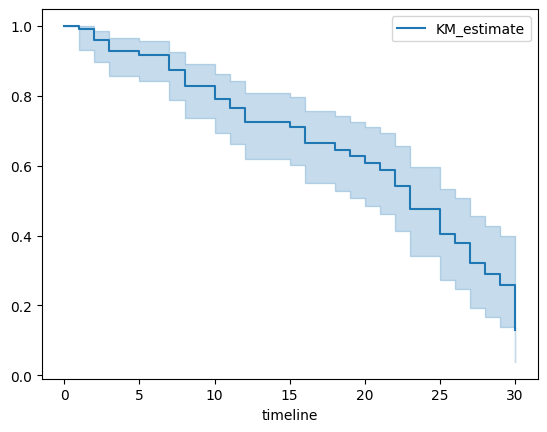

In [16]:
Kaplanm.plot_survival_function()


In [17]:
Kaplanm.median_survival_time_

23.0

Esto significa, que en el año 23, el 50% de las empresas ha quebrado

b) Estime la función de supervivencia por Kaplan-meier para hombres y 
mujeres y grafique con .plot_survival_function(ci_show=False) y diga si las 
empresas administradas por hombres/mujeres quiebran más rápido. No 
olvide etiquetar cada línea y agregar todos los elementos en cada gráfica.

Text(0.5, 0, 'Años')

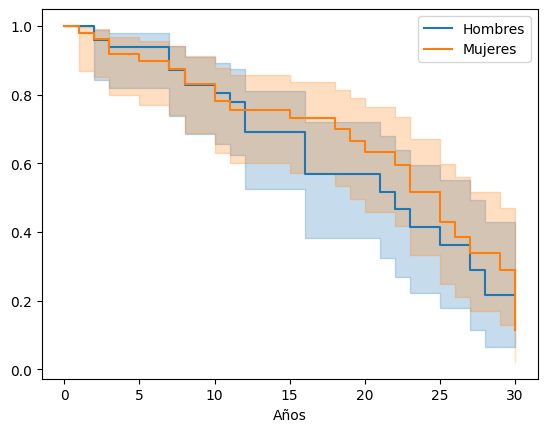

In [20]:
hombres = datos.query('mujer == 0')
mujeres = datos.query('mujer == 1')
kmHombres = KaplanMeierFitter().fit(hombres['tiempo'], hombres['quebrar'])
kmMujeres = KaplanMeierFitter().fit(mujeres['tiempo'], mujeres['quebrar'])

kmHombres.plot_survival_function(label = 'Hombres')
kmMujeres.plot_survival_function(label = 'Mujeres')
plt.xlabel('Años')


Parece ser que la mayoría del tiempo, las empresas administradas por hombres quiebran más rápido que las administradas por mujeres, aunque las funciones de supervivencia parecen traslaparse y ser iguales en ciertos intervalos, por lo que hay que verificar que sean iguales o diferentes con una prueba de hipótesis

c) El profesor cree que las empresas fundadas por hombres quiebran más 
rápido, refute o confirme con evidencia estadística tal afirmación 
(pruebas de hipótesis, graficas, tablas etc.)

In [23]:
from lifelines.statistics import logrank_test

Vamos a hacer una prueba de hipótesis llamada (log rank test)\
$H0: s(1) = s(2)$ funciones de supervivencia iguales\
$Ha: s(1)\neq s(2)$ funciones de supervivencia distintas 

In [26]:
LRT = logrank_test(hombres['tiempo'], mujeres['tiempo'], hombres['quebrar'], mujeres['quebrar'])
LRT.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.28 0.59      0.75

In [28]:
LRT.p_value

0.5935186303825366

Con un $\alpha = 0.05$ No Rechazamos H0, las funciones de supervivencia son iguales, las empresas administradas por hombres no quiebran más rápido que las administradas por mujeres. Tomando en cuenta los datos, realmente no habría diferencia en la supervivencia de una empresa administrada por un hombre o una mujer.